# T1 Q3

---

In [1]:
import math
import csv
import numpy as np
import random as rand
import matplotlib.pyplot as plt

## Q1

---

In [2]:
K_true = 10
def generate_aj (K_true):
    a_j = []
    for i in range(0, K_true):
        a_j.append(rand.uniform(-1,1))
    return a_j
a_j = generate_aj (K_true)

In [37]:
N = 20
def generate_data (N):
    data = []
    for j in range(0, N):
        data.append(rand.uniform(-5,5))
    return data
data = generate_data(N)

In [38]:
def poly (data, a_j, k_high):
    poly_output = []
    for x in data: 
        total_sum = 0
        for j in range(len(a_j)):
            total_sum += a_j[j] + x**j
        poly_output.append(total_sum)
    return poly_output
poly_rand_output = poly (data, a_j, K_true)

In [43]:
def compute_y (data, k_high):  
    a_j = generate_aj (k_high+1)
    y_i_prior = poly (data, a_j, k_high)
    eps_lst = []
    for i in range(len(data)):
        eps_lst.append(np.random.normal(0, (max(y_i_prior) - min(y_i_prior))/10))
    y_i = np.add(y_i_prior, eps_lst)
    return y_i
y_i = compute_y (data, K_true)

In [56]:
def a_vector_lst (data, y_i, k_high):
    return  np.polyfit(data, y_i, k_high)
a_lst = a_vector_lst(data, y_i, K_true)
poly_output = poly (data, a_lst, K_true)

## Q2

---

In [54]:
def chi_square (X, Y):
    sigma = (max(X) - min(X)) / 10.0
    return np.sum((np.array(Y) - np.array(X)) ** 2) / sigma**2
chi_square(poly_output, y_i)

55.625463109447388

In [66]:
def min_chi (data):
    chi_lst = []
    y_i = compute_y (data, K_true)
    for k in range(1, N):
        a_lst = a_vector_lst(data, y_i, k)
        poly_output = poly (data, a_lst, k)
        chi_lst.append(chi_square (poly_output, y_i))
    return chi_lst[np.argmin(chi_lst)]
min_val = min_chi(data)

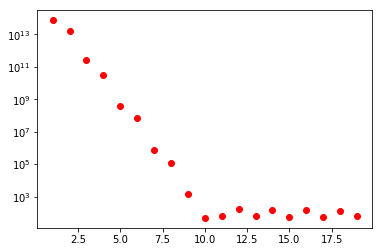

In [60]:
N = 20
data = generate_data(N)
y_i = compute_y (data, K_true)
chi_lst = []
for k in range(1, N):
    a_lst = a_vector_lst(data, y_i, k)
    poly_output = poly (data, a_lst, k)
    chi_lst.append(chi_square (poly_output, y_i))
plt.semilogy(range(1,N), chi_lst, 'ro')
plt.show()

## Q3

---

In [104]:
N = 20
def BIC (data, k_high, N):
    y_i = compute_y (data, K_true)
    a_lst = a_vector_lst(data, y_i, K_true)
    poly_output = poly (data, a_lst, K_true)
    sigma = (max(poly_output) - min(poly_output)) / 10.0
    min_val = min_chi(data)
    return N/2*math.log(2*math.pi*sigma**2) - N ** math.e + 1/2*min_val + k_high/2*math.log(N)

In [105]:
def find_min_k (N, k_high):
    bic_lst = []
    for k in range(0, k_high+1):
        data = generate_data(N)
        bic_lst.append(BIC (data, k, N))
    return np.argmin(bic_lst)
find_min_k (20, 15)

/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


3

In [101]:
k_lst = []
for i in range(500):
    k_lst.append(find_min_k(20,15))
print np.mean(k_lst), np.var(k_lst)

/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine

4.602 17.347596


/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


### Q4

---

In [110]:
k_lst = []
log_space = 3*np.logspace(0,4,40)
for n in range(len(log_space)):
    inner_k = []
    for i in range(500):
        inner_k.append(find_min_k (int(log_space[n]), 15))
    k_lst.append([np.mean(inner_k), np.var(inner_k)])
print k_lst

/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/christine

KeyboardInterrupt: 